# Linear regression

선형회귀는 전통적인 통계학 과목에서 많이 다루는 내용이라 여기서는 간단히 언급하고 넘어가도록 한다.

여러 입력 변수를 가지는 선형회귀모형을 고려해 보자.

$$ Y = \theta_0 + \theta_1 X_1 + \cdots + \theta_p X_p + \epsilon $$

이 모형의 모수는 $\theta_0, \theta_1, \cdots, \theta_p$이며, 우리는 이 모수들의 추정치를 구하는 데에 관심이 있다.

앞서 공부한 행렬 표현법과 다른점은 모수가 $\theta_0$부터 시작하기 때문에 총 $p+1$개가 존재한다.

또한 $x_{ij}$로 이루어진 $N \times (p+1)$ 행렬 $\mathbf{X}_b$를 생각할 수 있다.

$$ 
\mathbf{X}_b = \begin{bmatrix} 
    x_{10} & x_{11} & \cdots & x_{1p}\\
    x_{20} & x_{21} & \cdots & x_{2p}\\
    \vdots & \vdots & \ddots & \vdots \\
    x_{N0} & x_{N1} & \cdots & x_{Np}  
    \end{bmatrix}
$$

$i$번째 관찰값들인 $x_i$는 총 $p+1$개의 값을 지니며, 편의상 $x_{i0} = 1 $로 한다.

그 외의 사항은 앞 단원의 내용과 동일하다.

## 정규방정식

위의 셋팅에서 선형회귀계수들의 추정량은 이론적으로 다음으로 같다는 것이 잘 알려져 있다.

$$ \hat{\boldsymbol{\theta}} = (\mathbf{X}_b^{\top}\mathbf{X}_b)^{-1} \mathbf{X}_b^{\top} \mathbf{y} $$

[```numpy```](https://numpy.org/)를 이용하여 정규방정식을 계산해 보자.

- 아래 코드에서 [`np.random.rand(100, 1)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)는 0과 1사이에서 uniform 분포로 랜덤 샘플을 생성. 여기서 `(100, 1)`은 생성된 샘플의 shape.
   -  `(100, 1)` : 행이 100개, 열이 1개인 행렬 (numpy array)
- 비슷하게 [`np.random.randn(100, 1)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)는 `(100, 1)`의 shape을 가지는 표준정규분포 샘플을 생성

가상의 모형 : $ Y = 4 + X + \epsilon $

In [1]:
import numpy as np

In [2]:
# 가상의 데이터 생성

X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

# 모든 샘플에 x0 = 1 추가
# c_ 는 column 방향으로 stacking
Xb = np.c_[np.ones((100, 1)), X]

[`pandas`](https://pandas.pydata.org/)는 데이터 분석을 위한 라이브러리로 아래 코드에서는 `Xb`의 내용을 출력해 보기 위해 사용하였다. 

In [3]:
import pandas as pd
pd.DataFrame(Xb)

,0,1
0,1.0,1.163440
1,1.0,0.905596
2,1.0,0.972488
3,1.0,1.952639
4,1.0,0.324309
...,...,...
95,1.0,1.386199
96,1.0,1.436618
97,1.0,1.289823
98,1.0,1.432072


정규방정식을 계산하기 위해 다음의 코드를 활용하였다.

- `.T` : 전치(transpose)를 구하기 위해 사용됨
- `.dot()` : 행렬과 행렬의 곱, 혹은 행렬과 벡터의 곱을 위해 사용됨.
  - 아래에서는 numpy array의 메소드로 활용되었으나 함수인 `np.dot()`을 이용할 수도 있음
- `np.linalg.inv()` : 역행렬을 구하는 함수

In [4]:
theta_best = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(Y)
theta_best

array([[3.99412396],
       [2.85209684]])

혹은 ```@```를 이용하여 더 간단히 나타낼 수 있다.

In [5]:
np.linalg.inv(Xb.T @ Xb) @ Xb.T @ Y

array([[3.99412396],
       [2.85209684]])

이렇게 추정한 추정치 $\hat \theta$를 BLUE (Best Linear Unbiased Estimator)라고도 부른다.

## [```sklearn.linear_model.LinearRegression```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

```sklearn```을 이용하는 방법도 살펴보자.  

```sklearn.linear_model```이라는 서브 모듈로부터 ```LinearRegression``` 클래스를 import한다.  

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

```sklearn```의 대부분의 모형들은 모형 적합을 위해 ```.fit``` method를 이용한다.

추정 결과는 ```.fit()``` 적용 후에 instance의 attribute인 ```intercept_```와 ```coef_```에 access하여 얻는다.

* ```coef_```는 ```(n_features, )``` 혹은  ```(n_targets, n_features)```의 shape을 가진 numpy array이로서 $\theta_1, \cdots, \theta_p$의 추정치를 나타낸다.

* ```intercept_```는 ```(n_targets,)```의 shape을 지닌 array로서 $\theta_0$의 추정치를 나타낸다.  

In [7]:
# fitting은 간단히 다음으로 이루어진다.
lin_reg.fit(X = X, y = Y)
lin_reg.intercept_, lin_reg.coef_

(array([3.99412396]), array([[2.85209684]]))

### MSE 비용함수와 선형회귀에서의 최적화

위의 정규 방정식은 이론적으로 다음의 비용함수를 최소화하는 값이다.

$$ \mathrm{MSE}(\boldsymbol{\theta}) = \frac{1}{N} \sum_{i=1}^{N} (x_i \cdot \boldsymbol{\theta} - y_i)^2 $$

- 여기서 $\cdot$ 은 벡터 내적이며, $x_i \cdot \boldsymbol{\theta} = x_i^{\top} \boldsymbol{\theta} $이다.
  
- $x_i$는 $\mathbf X_b$의 $i$번째 행 벡터

위 식은 MSE (Mean Squared Error) 비용함수라고 불리우며, 실제값과 예측값 차이의 제곱을 손실함수 ($L_2$ 손실함수)로 하여 이들의 합을 최소화하는 $\boldsymbol{\theta}$를 찾는 것을 목적으로 한다.

$\boldsymbol{\theta} = \begin{bmatrix}\theta_0  & \theta_1 &  \cdots &  \theta_p \end{bmatrix}^{\top}$이기 때문에, $\mathrm{MSE}(\boldsymbol{\theta})$는 실제로 $\theta_0, \theta_1,  \cdots,  \theta_p$의 함수임을 주목하자.

또한, $\mathrm{MSE}(\boldsymbol{\theta})$는 관찰값 $\mathbf{X}_b, \mathbf{y}$에 따라 달라진다.

기계학습의 많은 방법들은 적절한 비용함수를 정의하고 이 비용함수를 최소화하는 $\boldsymbol{\theta}$를 추정량으로 삼는다.

모형에 따라 선형회귀 방법처럼 해석적인 솔루션을 제공하는 경우도 있지만, 많은 경우 경사하강법과 같은 수치적 방법을 통해 근사값을 찾아낸다.

연습삼아 경사하강법을 선형회귀 모형에 적용해 보자.

## 경사하강법 (GD, Gradient Descent)

경사하강법은 여러 기계학습의 방법론에서 최적의 해를 찾는 일반적인 방법이다.

비용함수, 예를 들어 앞에서 제시한 $\mathrm{MSE}(\boldsymbol{\theta})$는 주어진 관찰값 $\mathbf{X}_b, \mathbf{y}$이 있을 때, $\theta_0, \theta_1,  \cdots,  \theta_p$의 함수이다.

비용함수의 형태에 따라 $\mathrm{MSE}(\boldsymbol{\theta})$의 $\theta_0, \theta_1,  \cdots,  \theta_p$에 대한 기울기를 이론적으로 계산할 수도 있고, 함수의 형태가 복잡할 경우 수치적으로 계산할 수도 있다.

경사하강법은 계산된 기울기를 바탕으로 비용함수의 값이 감소하는 방향을 따라 비용함수를 최소화하는 극소 지점을 향해 조금씩 이동하는 방법이다.

모수가 여러 개인 경우, 각 모수($\theta$)들에 대해 비용함수의 기울기들을 계산할 수 있는데 이 기울기들을 모아놓은 벡터를 그레디언트 벡터라고 한다.

그레디언트 벡터는 $\nabla$ 혹은 $\nabla_{\boldsymbol{\theta}}$로 표현한다.

따라서 $\mathrm{MSE}(\boldsymbol{\theta})$의 그레디언트 벡터는

$$
\nabla_{\boldsymbol{\theta}} \mathrm{MSE} (\boldsymbol{\theta}) = \begin{bmatrix} \frac{\partial}{\partial \theta_0} \mathrm{MSE}(\boldsymbol{\theta}) \\ \frac{\partial}{\partial \theta_1} \mathrm{MSE}(\boldsymbol{\theta}) \\ \vdots \\ \frac{\partial}{\partial \theta_p} \mathrm{MSE}(\boldsymbol{\theta}) \end{bmatrix} 
$$

와 같이 표현할 수 있다.

여기서 $$ \frac{\partial}{\partial \theta_j} \mathrm{MSE}(\boldsymbol{\theta})$$는 편미분이며 다른 변수들을 고정한 후, $\mathrm{MSE}(\boldsymbol{\theta})$를  $\theta_j$로 미분하였음을 의미한다.

### 선형회귀모형의 graident vector


위에서 언급함 비용함수
$$ \mathrm{MSE}(\boldsymbol{\theta}) = \frac{1}{N} \sum_{i=1}^{N} (x_i \cdot \boldsymbol{\theta} - y_i)^2 $$
를 고려하자.

$$ x_i \cdot \boldsymbol{\theta} = \theta_0 + x_{i1} \theta_1 + \cdots +  x_{ip} \theta_p,$$
이므로, 
$$ \frac{\partial }{\partial \theta_j} (x_i \cdot \boldsymbol{\theta} - y_i)^2 = 2 (x_i \cdot \boldsymbol{\theta} - y_i) x_{ij}$$
를 얻는다.

위의 관계를 이용하면,
\begin{align*}
\frac{\partial }{\partial \theta_j} \mathrm{MSE}(\boldsymbol{\theta}) &= \frac{2}{N} \sum_{i=1}^{N} (x_i \cdot \boldsymbol{\theta} - y_i) x_{ij} \\
& = \frac{2}{N} \begin{bmatrix} x_{1j} & \cdots  & x_{Nj} \end{bmatrix} 
 \begin{bmatrix} x_1 \cdot \boldsymbol{\theta} - y_1 \\ \vdots \\ x_N \cdot \boldsymbol{\theta} - y_N \end{bmatrix} \\
& = \frac{2}{N} \begin{bmatrix} x_{1j} & \cdots  & x_{Nj} \end{bmatrix} 
\left( \begin{bmatrix} x_1 \cdot \boldsymbol{\theta}  \\ \vdots \\ x_N \cdot \boldsymbol{\theta}  \end{bmatrix} - \begin{bmatrix} y_{1} \\ \vdots \\ y_N\end{bmatrix}  \right)\\
& = \frac{2}{N} \begin{bmatrix} x_{1j} & \cdots  & x_{Nj} \end{bmatrix} 
\left( \begin{bmatrix} x_{10} & \cdots & x_{1p}  \\ \vdots &  & \vdots \\ x_{N0} & \cdots & x_{Np}   \end{bmatrix}  \boldsymbol{\theta} - \begin{bmatrix} y_{1} \\ \vdots \\ y_N\end{bmatrix}  \right)\\
& = \frac{2}{N} \mathbf x_j^{\top} (\mathbf X_b \boldsymbol{\theta} - \mathbf y).
\end{align*}
이다.

따라서 gradient vector는 다음으로 나타난다.
\begin{equation*}
\nabla_{\boldsymbol{\theta}} \mathrm{MSE} (\boldsymbol{\theta}) = \begin{bmatrix} \frac{\partial}{\partial \theta_0} \mathrm{MSE}(\boldsymbol{\theta}) \\ \frac{\partial}{\partial \theta_1} \mathrm{MSE}(\boldsymbol{\theta}) \\ \vdots \\ \frac{\partial}{\partial \theta_p} \mathrm{MSE}(\boldsymbol{\theta}) \end{bmatrix} 
= \frac{2}{N} \begin{bmatrix} \mathbf x_0^{\top} (\mathbf{X}_b \boldsymbol{\theta}- \mathbf y) \\ \mathbf x_1^{\top} (\mathbf X_b \boldsymbol{\theta} - \mathbf y) \\ \vdots \\  \mathbf x_p^{\top} (\mathbf X_b \boldsymbol{\theta} - \mathbf y) \end{bmatrix} = \frac{2}{N} \mathbf X_b^{\top} (\mathbf X_b \boldsymbol{\theta} - \mathbf y).
\end{equation*}

### 학습률과 경사 하강

적절한 학습률 $\eta$에 대해 내려가는 스텝의 크기는 $\eta \nabla_{\boldsymbol{\theta}} \mathrm{MSE} (\boldsymbol{\theta})$로 정한다. 

따라서 현재의 $\boldsymbol{\theta}$에서 다음 스텝에서의 $\boldsymbol{\theta}^{\text{(next step)}}$는 다음과 같다.

$$ \boldsymbol{\theta}^{\text{(next step)}} = \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}} \mathrm{MSE} (\boldsymbol{\theta}) $$

그레디언트 벡터는 올라가는 방향이기 때문에 비용함수의 극소점을 향해 내려가기 위해서는 $-$를 취한 것을 볼 수 있다.

학습률 $\eta$가 크면 더 빠르게 극소점을 향해 갈 것이고, $\eta$가 작으면 천천히 향해 갈 것이다.

그러나 학습률이 너무 크면, 극소점을 건너 뛰어 제대로 수렴하지 못할 수도 있다.

많은 경우 비용함수의 정확한 형태를 모르기 때문에 적절한 $\eta$를 설정하는 것은 반복적인 trial and error를 통해 결정할 수 밖에 없다.

경사 하강법은 다시 몇 가지로 분류된다.

### 배치 경사 하강법

경사 하강법을 구현하려면 앞서 살펴 보았던 gradient vector를 매 스텝마다 계산하여야 한다.

만약 gradient vector를 계산할 때 모든 훈련 데이터를 이용한다면 이를 배치 경사 하강법 (batch gradient descent)이라고 한다.

만약 훈련 세트가 매우 크다면 gradient vector를 계산하는데 시간이 오래 걸릴 것이다.

위의 선형회귀 모형에 경사하강법 알고리즘을 적용해 보자.

```np.random.randn```는 표준 정규 분포를 따르는 랜덤값을 생성하는데, 이를 이용하여 경사 하강법의 초기값을 임의로 지정할 것이다.

In [8]:
temp = np.random.randn(2, 1)
temp

array([[ 1.48805307],
       [-0.44258416]])

아래 코드에서 ```np.ravel```는 해당 array의 모든 차원을 없애 일차원 array로 바꾼다. 

In [9]:
np.ravel(temp)

array([ 1.48805307, -0.44258416])

In [10]:
eta = 0.1 # 학습률
n_iteration = 100
N = len(Y)

theta = np.random.randn(2, 1)  #무작위 초기화
evolution = np.ravel(theta)

for _ in range(n_iteration):
    grad = 2 / N * Xb.T @ (Xb @ theta - Y)
    # update theta
    theta = theta - eta * grad
    evolution = np.vstack((evolution, np.ravel(theta)))

추정치의 값이 어디로 수렴하였는지 확인해 보자.

In [11]:
theta

array([[3.82686917],
       [2.98539691]])

수렴 경로를 살펴 보자.

In [12]:
evolution

array([[-2.28471615, -0.13843273],
       [-0.37684951,  2.12729183],
       [ 0.65539222,  3.29770734],
       [ 1.22597117,  3.89213392],
       [ 1.5528169 ,  4.1839273 ],
       [ 1.7506666 ,  4.3169675 ],
       [ 1.87993635,  4.3669787 ],
       [ 1.97244697,  4.37380812],
       [ 2.04496628,  4.35841763],
       [ 2.1063377 ,  4.33182822],
       [ 2.16123277,  4.2998283 ],
       [ 2.21212656,  4.2654522 ],
       [ 2.26033746,  4.23028483],
       [ 2.30657458,  4.19514843],
       [ 2.35122593,  4.1604641 ],
       [ 2.39451009,  4.1264421 ],
       [ 2.43655607,  4.09318198],
       [ 2.47744537,  4.0607253 ],
       [ 2.51723414,  4.02908341],
       [ 2.55596482,  3.99825199],
       [ 2.59367229,  3.96821878],
       [ 2.63038714,  3.93896759],
       [ 2.66613738,  3.91048039],
       [ 2.70094934,  3.88273848],
       [ 2.73484815,  3.855723  ],
       [ 2.76785805,  3.82941528],
       [ 2.80000249,  3.80379695],
       [ 2.83130424,  3.77885005],
       [ 2.86178542,

Visualization을 통해, 추정의 과정을 살펴보자.  
이를 위해 ```MSE``` 함수를 먼저 정의하겠다.

$$ \mathrm{MSE}(\boldsymbol{\theta}) = \frac{1}{N} \sum_{i=1}^{N} (x_i \cdot \boldsymbol{\theta} - y_i)^2 $$

In [13]:
# define MSE
def MSE(theta, X, y):
    mse = 0
    for i in range(X.shape[0]):
        mse = mse + (X[i,:].T @ theta - y[i]) ** 2
    return mse / X.shape[0]

아래 코드에서 2-D plot을 위해 ```meshgrid``` 함수가 이용되는데, 보통 n-dimensional function을 계산하는데 사용된다.  
예를 들어,  

In [14]:
xx = np.array([-1, 0, 1])
yy = np.array([-2, 0, 2])
XX, YY = np.meshgrid(xx, yy)

In [15]:
XX

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [16]:
YY

array([[-2, -2, -2],
       [ 0,  0,  0],
       [ 2,  2,  2]])

In [17]:
ZZ = (XX + YY) ** 2
ZZ

array([[9, 4, 1],
       [1, 0, 1],
       [1, 4, 9]])

In [18]:
# with visualization
import matplotlib.pyplot as plt
import matplotlib as mpl

theta0 = np.linspace(-2, 9, 100)
theta1 = np.linspace(-2, 9, 100)
Theta0, Theta1 = np.meshgrid(theta0, theta1)

Z = np.zeros_like(Theta1)

for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = MSE([Theta0[i,j], Theta1[i,j]], Xb, Y)[0]

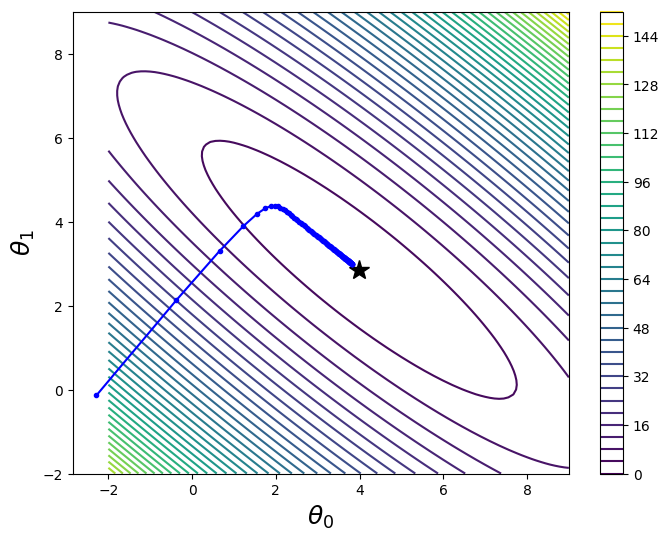

In [19]:
fig = plt.figure(figsize = (8, 6))

#contour plot for MSE
contours = plt.contour(Theta0, Theta1, Z, levels = 40)

theta_optimal = np.linalg.inv(Xb.T @ Xb) @ Xb.T @ Y
plt.plot(theta_optimal[0], theta_optimal[1], 'k*', markersize=15)

# line plot for estimation procedure
plt.plot(evolution[:,0], evolution[:,1], ".-", color='blue')
plt.colorbar(contours)

plt.xlabel(r"$\theta_0$", fontsize=18)
plt.ylabel(r"$\theta_1$", fontsize=18)

plt.show()

### 확률적 경사 하강법

확률적 경사 하강법 (stochastic gradient decent)에서는 매 스텝에서 샘플의 one observation을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산한다.

장점

- 매 스텝에서의 그레디언트 계산이 빠르다.

- 매 반복에서 하나의 샘플만 취하면 되므로, 매우 큰 훈련 데이터도 학습 가능하다.

단점

- 샘플은 무작위로 선택되므로 배치 경사 하강법보다 불안정하다.

- 비용함수가 최소값에 이를 때까지 요동치며 접근하며, 최소값에 완전히 안착하지 못한다.

하지만, 마지막 단점은 오히려 장점이 되기도 한다. 

- 비용함수의 형태가 불규칙할 경우 지역 극소값을 건너뛸 수도 있기 때문.
- 반면 배치 경사하강법은 지역 극소값에 도달시 빠져나오지 못해 전역 극소값으로 가지 못한다.

한편, sample을 선택할 때, 비복원 추출을 하며, 이에 따라 데이터의 개수만큼 스텝이 진행되면 모든 샘플들이 한 번씩 선택된다.  

- 이 하나의 과정을 **epoch** 라고 부른다. 

- 통상적으로 여러 번의 epoch를 수행한다.


단점을 극복하기 위해, 최소값에 도달하게 하기 위해서 학습률을 점진적으로 감소시키는 기법이 있다.

- 매 반복에서 학습률을 결정하는 함수를 학습 스케쥴이라고 한다.

아래 코드에서는 이를 간단히 구현하였다.

- learning rate을 보다 정교하게 주관하는 함수 ```leargning_schedule```를 정의하였다.

In [20]:
t0, t1 = 5, 100

def learning_schedule(t):
    return t0 / (t + t1)

그림을 그려보면 다음과 같다.

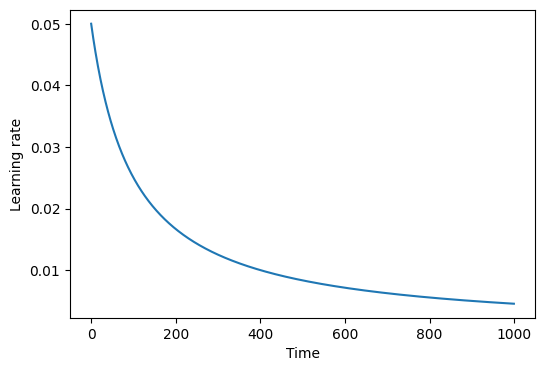

In [21]:
fig = plt.figure(figsize = (6, 4))

plt.plot(np.arange(0,1000,1), learning_schedule(np.arange(0,1000,1)))

plt.ylabel("Learning rate")
plt.xlabel("Time")
plt.show()

아래 코드에서는 epoch 수행 횟수를 ```n_epochs```로 정의하였다.

In [22]:
n_epochs = 50

theta = np.random.randn(2, 1)
evolution_s = np.ravel(theta)

for epoch in range(n_epochs):
    
    # 랜덤 셔플링을 통해 미리 훈련할 샘플의 순서를 정한다.
    random_idxes = np.random.choice(range(N), size=N, replace=False)  

    for i, rd_id in enumerate(random_idxes):
        
        # 하나의 observation을 선택
        xi, yi = Xb[rd_id:rd_id+1, ], Y[rd_id:rd_id+1, ]
        
        # gradient 계산
        grad = 2 * xi.T @ (xi @ theta - yi)
        
        # learning schedule 설정
        eta = learning_schedule(epoch * N + i)
        
        # theta 이동
        theta = theta - eta * grad
        
        evolution_s = np.vstack((evolution_s, np.ravel(theta)))
        
theta

array([[3.98773176],
       [2.85309052]])

In [23]:
evolution_s 

array([[-0.42231137,  0.18332146],
       [ 0.18433848,  0.68230235],
       [ 0.61034228,  0.88446891],
       ...,
       [ 3.98454059,  2.85181365],
       [ 3.98751274,  2.85306869],
       [ 3.98773176,  2.85309052]])

물론 기계학습을 할 때마다 위와 같은 SGD의 코드를 매번 작성할 필요는 없다.

```sklearn```으로 간단히 구현할 수 있다.

[```sklearn.linear_model.SGDRegressor```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)는 확률경사하강법으로 추정하는 선형 모형에 대한 class를 제공한다.  



In [24]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg

SGDRegressor(eta0=0.1, penalty=None)

```sklearn.linear_model.LinearRegression```와 같이 모형을 추정할 때는 ```.fit``` method를 이용한다.  

```Y.ravel()```로 ```Y```값을 1d-array로 바꾸어 인자로 전달한다.

In [25]:
sgd_reg.fit(X, Y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.97727777]), array([2.84331838]))

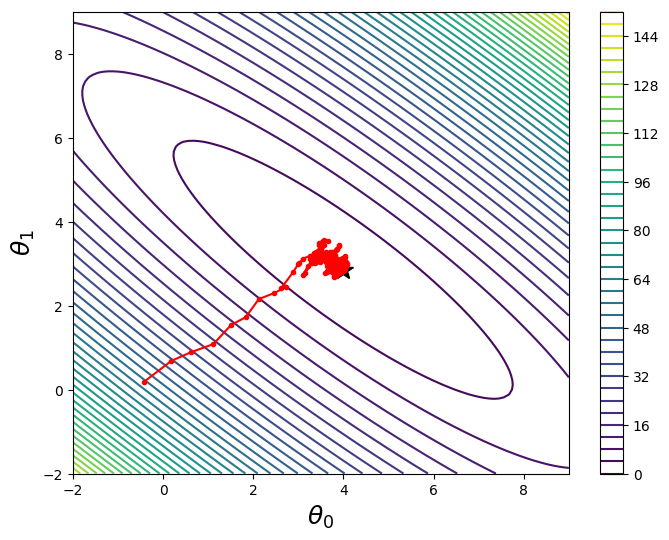

In [26]:
# with visualization
fig = plt.figure(figsize = (8, 6))
contours = plt.contour(Theta0, Theta1, Z, 40)
#plt.clabel(contours, inline = True, fontsize = 10)

plt.plot(theta_optimal[0], theta_optimal[1], 'k*', markersize=15)

# line plot for estimation procedure
plt.plot(evolution_s[:,0], evolution_s[:,1], ".-", color='red')
plt.colorbar(contours)

plt.xlabel(r"$\theta_0$", fontsize=18)
plt.ylabel(r"$\theta_1$", fontsize=18)

plt.show()

### 미니배치 경사 하강법

각 스텝에서 하나의 샘플이 아니라 미니배치라 불리우는 임의의 작은 수($>1$)의 샘플에 대해 그레디언트를 계산하는 방법.

그레디언트를 계산할 때 사용하는 샘플의 수를 보통 batch size라고 한다.

즉 SGD는 batch size = 1인 미니배치 경사 하강법과 같다.

미니배치의 크기를 적절히 하면 이 알고리즘은 파라미터 공간에서 SGD 보다 덜 불규칙하게 움직일 수 있다.

In [27]:
n_epochs = 50
t0, t1 = 5, 100
eta = 0.01

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

batch_size = 5     # batch 하나의 크기
num_batch = N // batch_size

evolution_m = np.ravel(theta)

for epoch in range(n_epochs):
    
    random_indexes = np.random.choice(range(N), size=N, replace=False)
        
    for i in range(num_batch - 1):
        
        selected_idxs = random_indexes[i * batch_size:(i + 1) * batch_size]
        xi, yi = Xb[selected_idxs, :], Y[selected_idxs, :]
        
        grad = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * N + i * batch_size)
        theta = theta - eta * grad
        evolution_m = np.vstack((evolution_m, np.ravel(theta)))

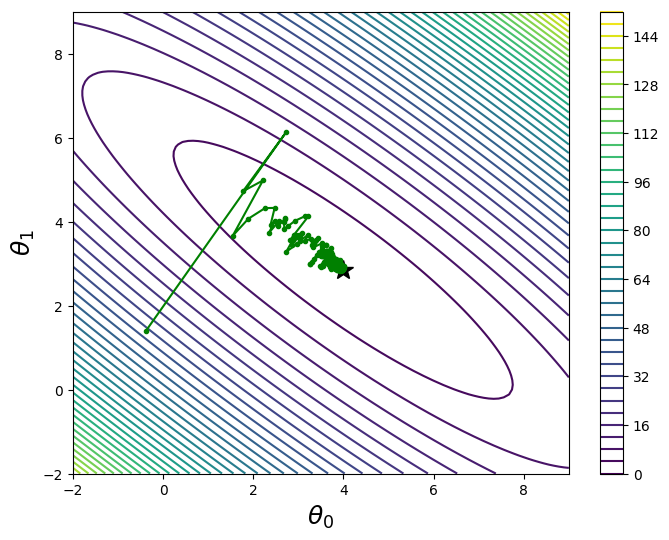

In [28]:
# with visualization
fig = plt.figure(figsize = (8, 6))
contours = plt.contour(Theta0, Theta1, Z, 40)

plt.plot(theta_optimal[0], theta_optimal[1], 'k*', markersize=15)

# line plot for estimation procedure
plt.plot(evolution_m[:,0], evolution_m[:,1], ".-", color='green')

plt.colorbar(contours)

plt.xlabel(r"$\theta_0$", fontsize=18)
plt.ylabel(r"$\theta_1$", fontsize=18)

plt.show()

교과서의 예제 그림에서 각 경사하강법의 차이를 한눈에 관찰할 수 있다.

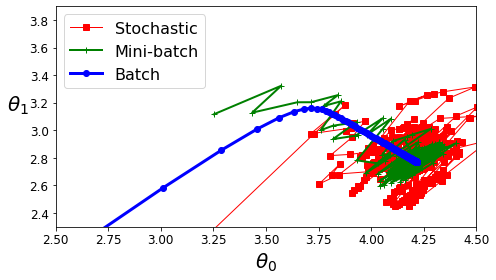